# Exploratory Data Analysis

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style("whitegrid")

In [3]:
# Reading data
df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Knowing about data and cleaning the data

In [4]:
#shape of data
df.shape

(9994, 13)

In [5]:
# Name of all columns in our dataset
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
# Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
# checking missing values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No missing value Its good...

In [8]:
# Number of unique values in every column
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

We can see that data is only of one country so this will not affect analysis so drop this 

In [9]:
# Droping 'Country' column
df = df.drop('Country',axis=1)
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Analysing the data

## Product level analysis

In [10]:
df['Category'].nunique()

3

In [11]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [12]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

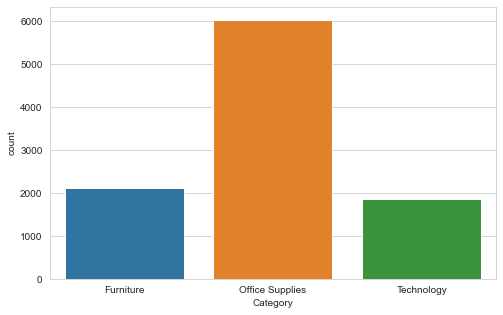

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x='Category',data=df)
plt.show()

We can see that Office supplies have more demand.

In [14]:
df['Sub-Category'].nunique()

17

In [15]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [16]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

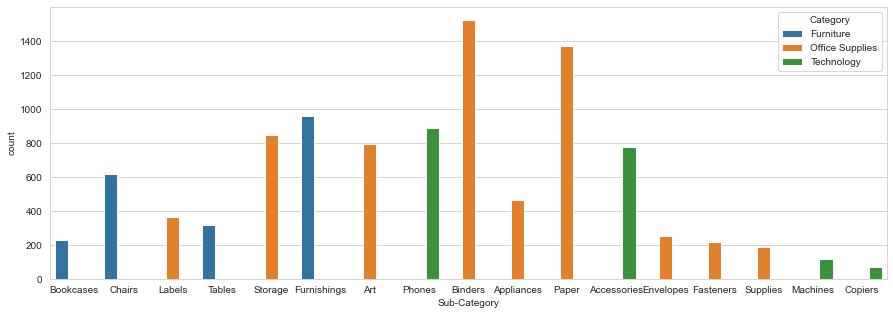

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(x='Sub-Category',hue='Category',data=df)
plt.show()

Binder and paper has more demand and overall Office supplies has more demand(Above). This can be seen below also (around 29 %)

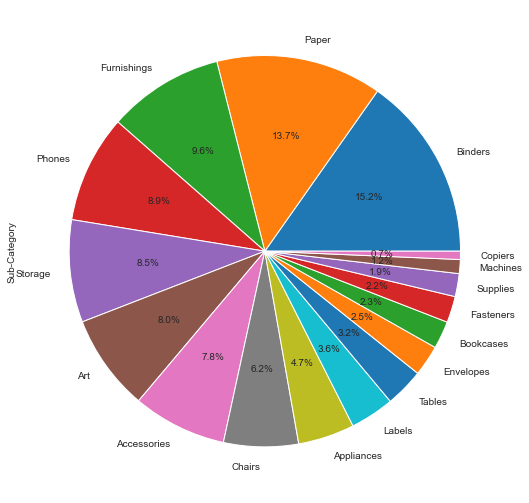

In [18]:
plt.figure(figsize=(9,9))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

<ipython-input-19-3ba1802c65b4>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(10,5))


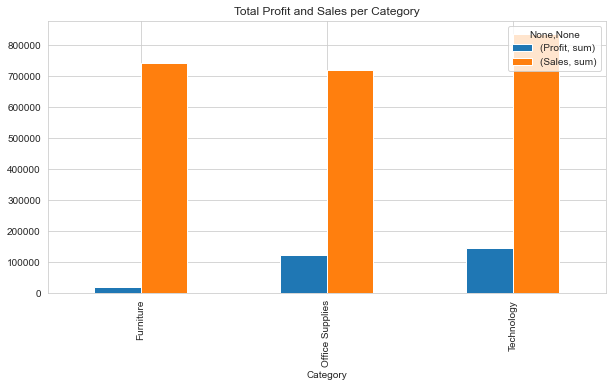

In [19]:
#plt.figure(figsize=(10,5))
df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(10,5))
plt.title('Total Profit and Sales per Category')
plt.show()

We can see that furniture section has very less profit although it has good sales.

Technology section has very good profit and sales.

<ipython-input-20-c72ca7d691de>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize = (12,6))


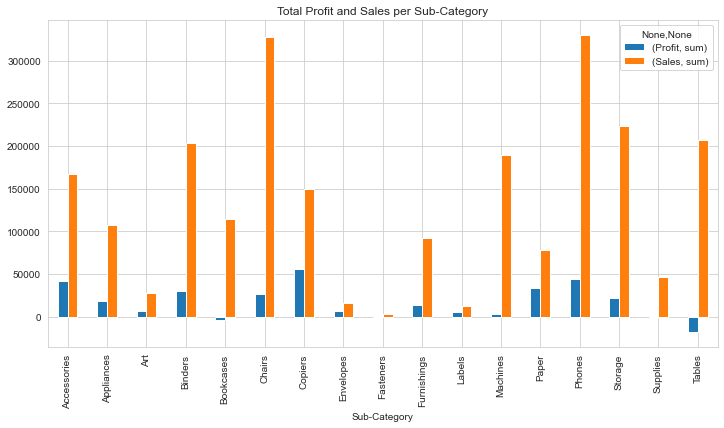

In [20]:
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize = (12,6))
plt.title('Total Profit and Sales per Sub-Category')
plt.show()

Above we can see that Copiers, Phones, Paper and accessories gives more profit than others and We can also see that there is loss in selling Tables and Bookcases.

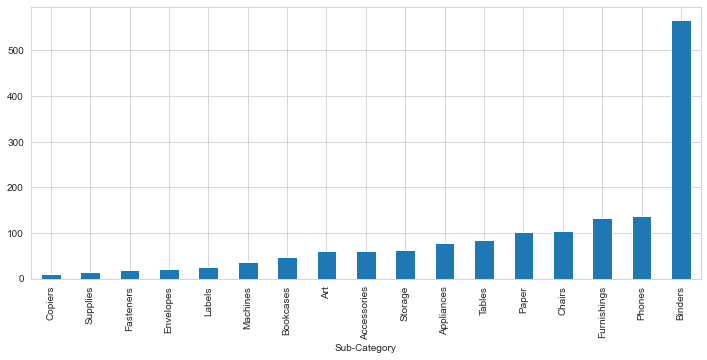

In [21]:
df.groupby('Sub-Category').sum()['Discount'].sort_values(ascending=True).plot.bar(figsize=(12,5))
plt.show()

More discount was given in binder that may be reason to increase sell of binder.

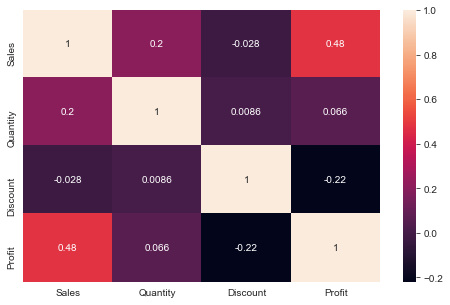

In [22]:
plt.figure(figsize=(8,5))
data=df[['Sales','Quantity','Discount','Profit']]
sns.heatmap(data.corr(),annot=True)
plt.show()

Here we can easily see that there is a positive correlation between Profit and sales i.e when sales increases profit also increases. we can also observe a negative correlation between Profit and discount.

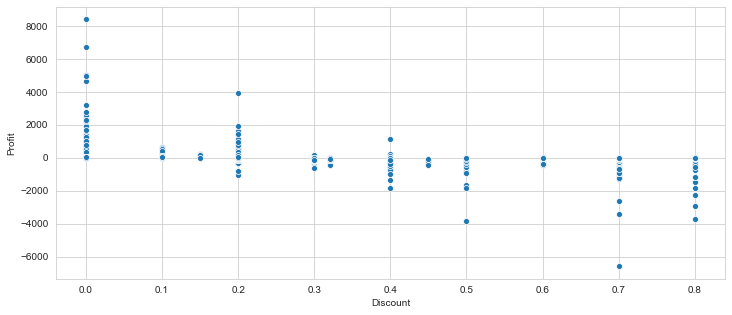

In [23]:
plt.figure(figsize=(12,5))
sns.scatterplot("Discount",'Profit',data=df)
plt.show()

Here we can easily see that there is profit upto discount 0.3 but after that there is loss, this satisfy above statement.

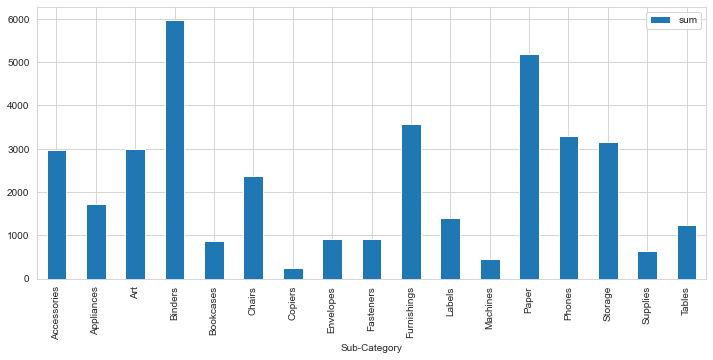

In [24]:
df.groupby('Sub-Category')['Quantity'].agg(['sum']).plot.bar(figsize = (12,5))
plt.show()

Here we can see that binder and paper are sold in more quantity.

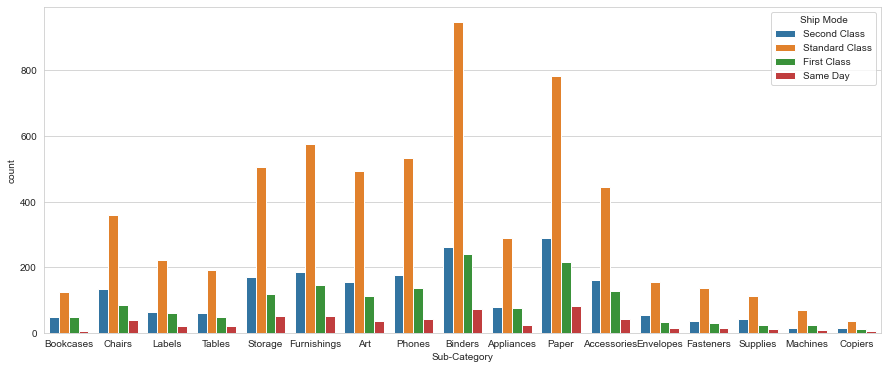

In [25]:
plt.figure(figsize=(15,6))
sns.countplot(x="Sub-Category", hue="Ship Mode", data=df)
plt.show()

Standard class mode is mostly used for delivery

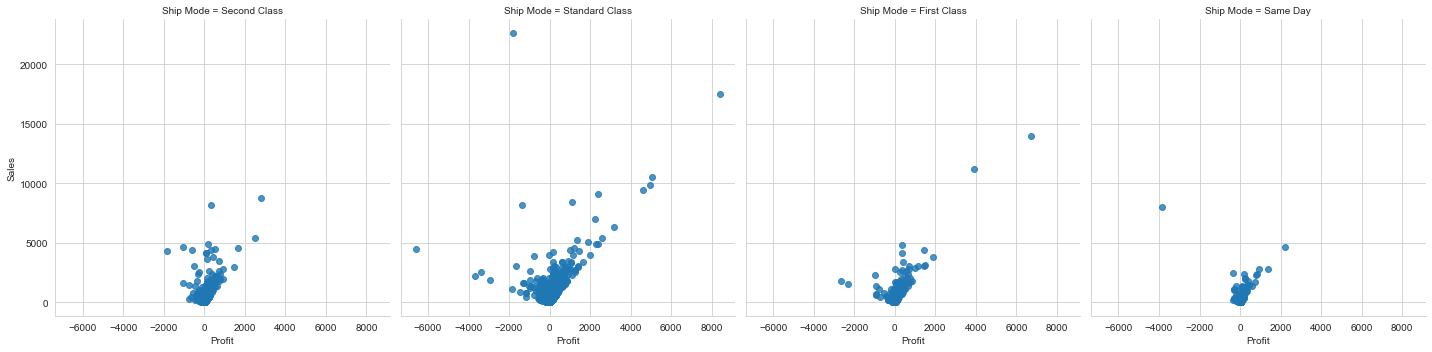

In [26]:
sns.lmplot(x="Profit",y="Sales",data=df,fit_reg=False,col="Ship Mode")
plt.show()

The profit is very high when the ship mode is Standard class. NO or very less profit when the ship mode is same day

## Consumer level analysis

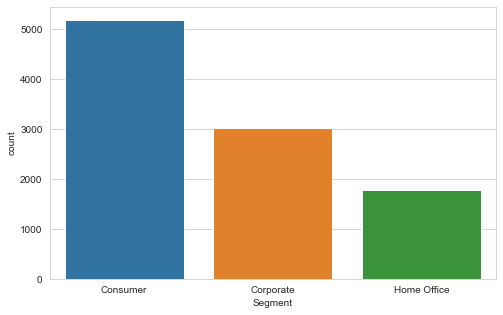

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(x='Segment',data=df)
plt.show()

Consumer segment has more distribution

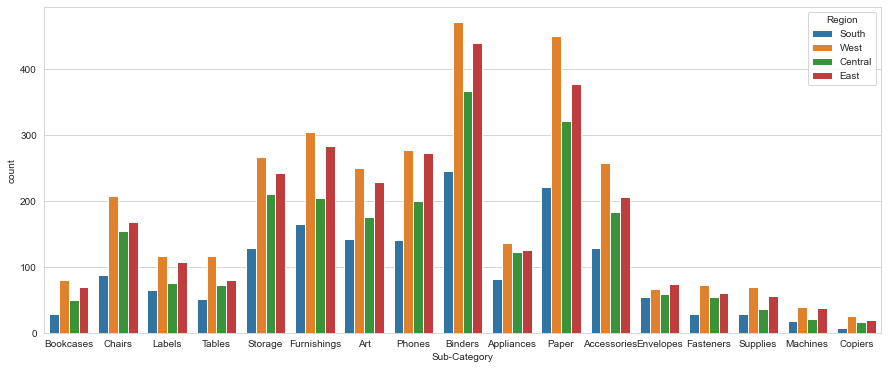

In [28]:
plt.figure(figsize=(15,6))
sns.countplot(x="Sub-Category", hue="Region", data=df)
plt.show()

People residing in west part and east part tend to order more from superstore. This can also be seen from below plot.

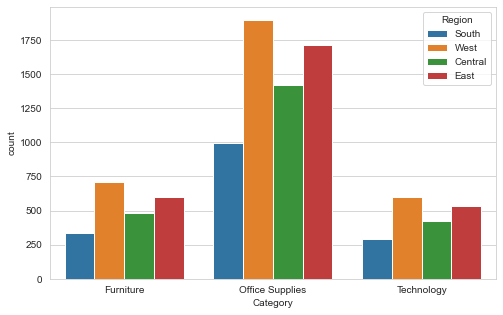

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x="Category", hue="Region", data=df)
plt.show()

In [30]:
# Citywise profit and loss.
pd.DataFrame(df.groupby('City').sum()['Profit'].sort_values(ascending=True)).head(20)


,Profit
City,
Philadelphia,-13837.7674
Houston,-10153.5485
San Antonio,-7299.0502
Lancaster,-7239.0684
Chicago,-6654.5688
Burlington,-3622.8772
Dallas,-2846.5257
Phoenix,-2790.8832
Aurora,-2691.7386


In [31]:
pd.DataFrame(df.groupby('City').sum()['Profit'].sort_values(ascending=False)).head(20)

,Profit
City,
New York City,62036.9837
Los Angeles,30440.7579
Seattle,29156.0967
San Francisco,17507.3854
Detroit,13181.7908
Lafayette,10018.3876
Jackson,7581.6828
Atlanta,6993.6629
Minneapolis,6824.5846


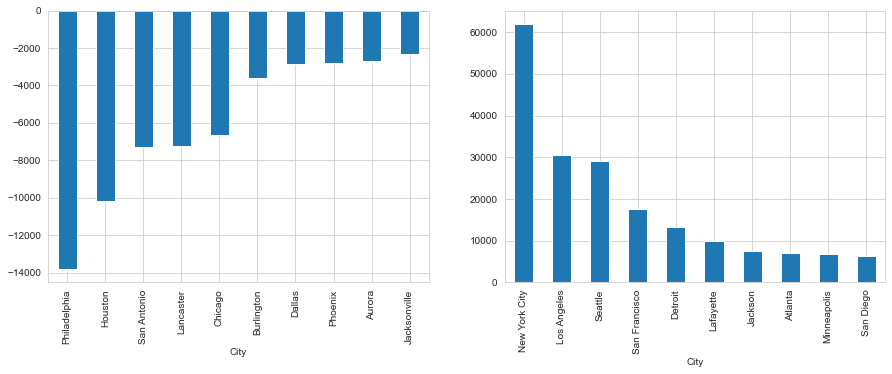

In [32]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

df.groupby('City').sum()['Profit'].sort_values(ascending=True).head(10).plot.bar(ax=axes[0])
df.groupby('City').sum()['Profit'].sort_values(ascending=False).head(10).plot.bar(ax=axes[1])
plt.show()

We see that the Profitable Cities are from New York to san Diego. And most loss from Philadelphia to Jacksonville.

In [33]:
# State wise profit and loss.
pd.DataFrame(df.groupby('State').sum()['Profit'].sort_values(ascending=True).head(20))

,Profit
State,
Texas,-25729.3563
Ohio,-16971.3766
Pennsylvania,-15559.9603
Illinois,-12607.8870
North Carolina,-7490.9122
Colorado,-6527.8579
Tennessee,-5341.6936
Arizona,-3427.9246
Florida,-3399.3017


In [34]:
pd.DataFrame(df.groupby('State').sum()['Profit'].sort_values(ascending=False).head(20))

,Profit
State,
California,76381.3871
New York,74038.5486
Washington,33402.6517
Michigan,24463.1876
Virginia,18597.9504
Indiana,18382.9363
Georgia,16250.0433
Kentucky,11199.6966
Minnesota,10823.1874


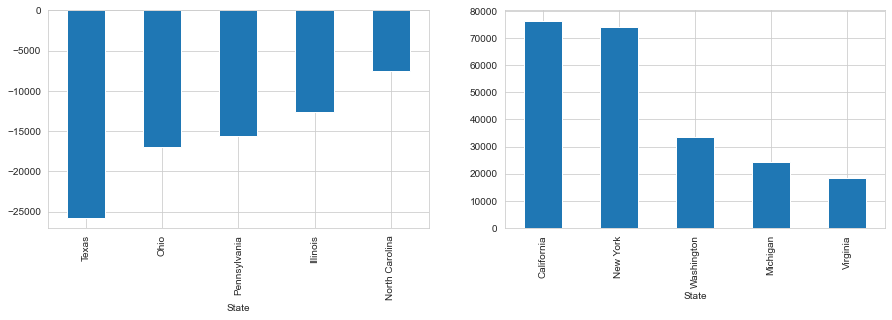

In [35]:
fig, axes = plt.subplots(1,2, figsize=(15,4))

df.groupby('State').sum()['Profit'].sort_values(ascending=True).head().plot.bar(ax=axes[0])
df.groupby('State').sum()['Profit'].sort_values(ascending=False).head().plot.bar(ax=axes[1])
plt.show()

We see that the Profitable States are from California to North Virginia. And most loss from Texas to North Carolina.

# FINAL INSIGHTS

1. Although office supplies is the most selling category but the profit is highest from the technology sector Under which the the profit has come more from the Consumers segment.


2. Although Copiers is the least selling sub-category but has given the most profit out of all the sub-categories.


3. The profit is very high when the ship mode is Standard class and very less profit when the ship mode is same day.


4. When the discount is till 0.3, there is a profit,But if the discount increases beyond 0.3 there is a loss happening.


5. There is a huge loss from the furniture section specially in table section.


6. The profit is more from the east and west region of the country.


7. The profit is very high from New York City and loss is very high in Philadelphia city.


8. The profit is very high from state California and loss is very high from state Texas.


9. Consumer segment has more distribution of superstore's product.


# SUGGESTIONS TO THE BUSSINESS

1. THE FURNITURE CATEGORY IS CAUSING A LOT OF LOSS, SO THE COMPANY CAN STOP SELLING FURNITURES OR SHOULD INCREASE THE PRICE OF THE FURNITURE CATEGORY OR CAN TRY TO REDUCE THE OVERALL COST OF THE PRODUCT.


2. THE DISCOUNT SHOULD NOT BE INCREASED BEYOND 0.3.


3. IF THE SHIPPING MODE IS "SAME DAY", THE SHIPPING CHARGES SHOULD BE INCREASED.


4. THE COMPANY SHOULD FOCUS MORE ON THE TECHNOLOGY SECTION.


5. COMPANY SHOULD SELL PRODUCT MORE IN EAST AND WEST REASON.
